<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For matrix operations
import numpy as np
# For plotting
import matplotlib.pyplot as plt

In [2]:
# For interactive widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

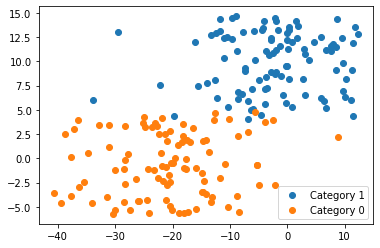

In [3]:
x1 = np.random.randn(100,1) * 10
y1 = np.random.uniform(low=4, high=15, size=(100,1))

x0 = np.random.randn(100,1) * 10 - 20
y0 = np.random.uniform(low=-6, high=5, size=(100,1))

data  = np.concatenate((np.concatenate((x1, y1), axis=1), np.concatenate((x0, y0), axis=1)), axis=0)
labels = np.concatenate((np.ones(100), np.zeros(100)))

plt.scatter(x1, y1, label="Category 1")
plt.scatter(x0, y0, label="Category 0")
plt.legend()
plt.show()

---
Note : Following 3 sections are for visualization.

In [4]:
#@title
def vis_boundary(mx, my, b):
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z_in = mx*X + my*Y + b
  Z = sigmoid(Z_in)

  c = plt.contourf(X, Y, Z, cmap='plasma')
  plt.colorbar(c)
  
  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])
  
  plt.scatter(inp0[:,0], inp0[:,1], label="Category 0", color="blue")
  plt.scatter(inp1[:,0], inp1[:,1], label="Category 1", color="red")
  plt.legend()
  plt.show()

In [5]:
#@title
def vis_boundary3D(mx, my, b, show_points=True):  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z_in = mx*X + my*Y + b
  Z = sigmoid(Z_in)

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.set_title("Z")
  
  if(show_points):
    ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
    ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
  
  ax.legend()
  c = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.5)
  ax.view_init(20, -70)

  fig.show()

In [6]:
#@title
def vis_plane(mx, my, b, show_points=True):  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z_in = mx*X + my*Y + b

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])

  fig = plt.figure()

  ax = fig.add_subplot(projection='3d')
  ax.set_title("Z_in")
  
  if(show_points):
    ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
    ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
  
  ax.plot_wireframe(X, Y, Z_in, linewidth=0.5, color="orange", label="Regression plane")
  ax.plot_wireframe(X, Y, np.zeros_like(X), linewidth=0.2, label="Zero plane")
  ax.legend()
  ax.view_init(20, -70)
  
  fig.show()

In [7]:
#@title
def vis_all(*args, **kwargs):
  vis_boundary(*args, **kwargs)
  vis_boundary3D(*args, **kwargs)
  vis_plane(*args, **kwargs)

---

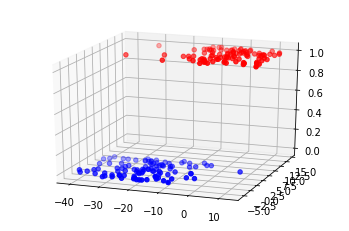

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(x1, y1, np.ones_like(x1), color="r", label="Category 1")
ax.scatter(x0, y0, np.zeros_like(x0), color="b", label="Category 0")
ax.view_init(20, -70)

In [9]:
interact(vis_plane, 
         mx = widgets.BoundedFloatText(min=-1, max=1, value=0.1, step=0.01), 
         my = widgets.BoundedFloatText(min=-1, max=11, value=0.1, step=0.01), 
         b = widgets.BoundedFloatText(min=-5, max=5, value=0, step=0.01),
         show_points=True)

interactive(children=(BoundedFloatText(value=0.1, description='mx', max=1.0, min=-1.0, step=0.01), BoundedFloa…

<function __main__.vis_plane>

---
# Concept of activation function

We cannot use a straight plane for this problem because we need output in the range 0 to 1

So, we pass the straight plane througha ```sigmoid``` or ```logistic``` function

\\[ s(x) = \frac{1}{1 + e^{-x}} \\]

The derivative is :
\\[ \dot{s}(x) = s(x) \times (1 - s(x)) \\]

In [10]:
def sigmoid(inp):
  return 1/(1 + np.exp(-inp))

def d_sigmoid(inp):
  return sigmoid(inp) * (1 - sigmoid(inp))

### You might be thinking : Why not the step function? Or maybe clip it between 1 and 0?

These are indeed great ideas to limit the value between 0 and 1
But then, 

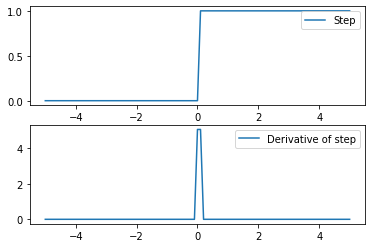

In [12]:
temp = np.linspace(-5, 5, 101)

step = (temp > 0).astype(np.int)
d_step = np.gradient(step)/(10/101)

plt.subplot(211)
plt.plot(temp, step, label="Step")
plt.legend()

plt.subplot(212)
plt.plot(temp, d_step, label="Derivative of step")
plt.legend()
plt.show()

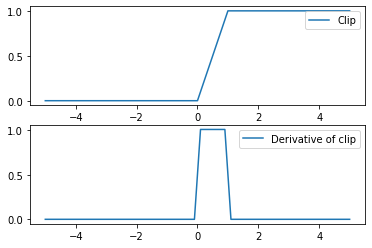

In [13]:
clip = np.maximum(np.minimum(temp, np.ones_like(temp)), np.zeros_like(temp))
d_clip = np.gradient(clip)/(10/101)

plt.subplot(211)
plt.plot(temp, clip, label="Clip")
plt.legend()

plt.subplot(212)
plt.plot(temp, d_clip, label="Derivative of clip")
plt.legend()
plt.show()

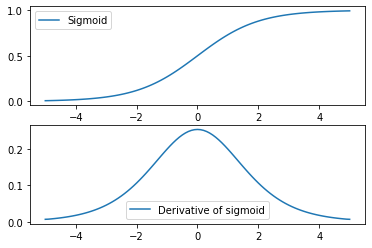

In [14]:
sig   = sigmoid(temp)
d_sig = np.gradient(sig)/(10/101)

plt.subplot(211)
plt.plot(temp, sig, label="Sigmoid")
plt.legend()

plt.subplot(212)
plt.plot(temp, d_sig, label="Derivative of sigmoid")
plt.legend()
plt.show()

---

In [15]:
interact(vis_all, 
         mx = widgets.BoundedFloatText(min=-10, max=10, value=1, step=0.2), 
         my = widgets.BoundedFloatText(min=-10, max=10, value=1, step=0.2), 
         b = widgets.BoundedFloatText(min=-50, max=50, value=0, step=0.2))

interactive(children=(BoundedFloatText(value=1.0, description='mx', max=10.0, min=-10.0, step=0.2), BoundedFlo…

<function __main__.vis_all>

---
# Binary crossentropy loss

\\[ E(y, \hat{y}) = (\hat{y} \times -\log{y}) + ((1 - \hat{y}) \times - \log{(1-y)}) \\]

That does look quite intimidating! But, we can make sense of it. Consider this :

$ \hat{y}_i $ can only have values 0 or 1. So, either one of the terms $(\hat{y_i} \times -\log{y_i})$ or $((1 - \hat{y_i}) \times - \log{(1-y_i)})$ appear at one time 

- When $ \hat{y}_i = 1 , E(y, \hat{y}) = -log(y) $

- When $ \hat{y}_i = 0 , E(y, \hat{y}) = -log(1 - y) $

For gradient descent, we need to know its gradient. It comes out to be :

\\[ \frac{\partial E (y, \hat{y})}{\partial y} = \frac{-\hat{y}}{y} + \frac{1-\hat{y}}{1-y} \\]

In [ ]:
def bce_loss(act, pred, epsilon=1e-5):
  return -(act * np.log(pred + epsilon))-((1-act)*np.log(1-pred + epsilon))

def d_bce_loss(act, pred, epsilon=1e-5):
  return -act / (pred + epsilon) + (1 - act)/(1 - pred + epsilon)

temp = np.linspace(0.01, 0.99, 25)
plt.plot(temp, bce_loss(np.ones_like(temp), temp), label="When y = 1")
plt.plot(temp, bce_loss(np.zeros_like(temp), temp), label="When y = 0")
plt.legend()
plt.show()

---
# Logistic regression

### Forward pass :

![Logistic regression image](https://github.com/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/docs/logistic_regression.png?raw=1)

\\[ z\_in = (x \times Wx + y \times Wy + B)\\]
\\[ z = s(z\_in) = \frac{1}{1 + e^{-z\_in}}\\]

\\[ E(z, \hat{z}) = ((\hat{z} \times -\log{z}) + ((1-\hat{z}) \times -\log(1-z))) \\]

### Backward pass :

![Logistic regresssion backward pass image](https://github.com/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/docs/logistic_regression_back.png?raw=1)

\\[ \frac{\partial E}{\partial z} = \frac{-\hat{z}}{z} + \frac{1-\hat{z}}{2-z}\\]

\\[ \frac{\partial E}{\partial z\_in} = \frac{\partial E}{\partial z} \times \frac{d z}{d z\_in} = \frac{\partial E}{\partial z} \times z \times (1-z) \\]

\\[ \frac{\partial E}{\partial W_x} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial W_x} = \frac{\partial E}{\partial z\_in} \times x\\]

\\[ \frac{\partial E}{\partial W_y} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial W_y} = \frac{\partial E}{\partial z\_in} \times y\\]

\\[ \frac{\partial E}{\partial B} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial B} = \frac{\partial E}{\partial z\_in}\\]

In our code,

- ```d_z``` = $ \frac{\partial E}{\partial z} $
- ```d_zin``` = $ \frac{\partial E}{\partial z\_in} $
- ```d_wx``` = $ \frac{\partial E}{\partial Wx} $
- ```d_wy``` = $ \frac{\partial E}{\partial Wy} $
- ```d_b``` = $ \frac{\partial E}{\partial B}


In [ ]:
# First, initialize slope and intercept randomly
wx = np.random.randn()
wy = np.random.randn()
b  = np.random.randn()

# Number of iterations
num_iter = 20

# Learning rate is the factor that is multiplied with the gradient
learning_rate = 2e-1       # Optimum rate from trial and error

# To store values of slope, intercept and error over training, for visualizing later
param_hist = []
error_hist = []

# Start training
for i in range(num_iter):
  z_in = wx * data[:,0] + wy * data[:,1] + b
  z    = sigmoid(z_in)

  # Compute error
  error = np.average(bce_loss(labels, z))
  print(" Error %.3f "%(error))

  # Visualize the current prediction
  vis_boundary(wx, wy, b)               # View in 2D
  # vis_boundary3D(wx, wy, b)             # View in 3D
  
  # Append to history to visualize later
  param_hist.append([wx, wy, b])
  error_hist.append(error)

  # Derivative of error with respect to z
  d_z = d_bce_loss(labels, z)

  # Back propagate through sigmoid function
  d_zin = d_z * d_sigmoid(z_in)
  
  # Derivative of errors with respect to slopes and intercepts
  d_wx = d_zin * data[:,0]
  d_wy = d_zin * data[:,1]
  d_b  = d_zin

  # Update predictions by gradient descent rule
  wx = wx - learning_rate * np.mean(d_wx)
  wy = wy - learning_rate * np.mean(d_wy)
  b  = b  - learning_rate * np.mean(d_b)

In [ ]:
plt.plot(error_hist, label="Error")
plt.xlabel("Iteration")
plt.legend()
plt.show()

plt.plot([params[0] for params in param_hist], label="Wx")
plt.plot([params[1] for params in param_hist], label="Wy")
plt.plot([params[2] for params in param_hist], label="B")
plt.xlabel("Iteration")
plt.legend()
plt.show()